In [73]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [74]:
dir()
A = np.array([3,5,11])
A.sum()

19

In [75]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [76]:
X = pd.DataFrame({"lstat": Boston["lstat"]})
X = sm.add_constant(X)
X[:4]

,const,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [77]:
y = Boston["medv"]
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
const,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [78]:
design = MS(["lstat"])
design = design.fit(Boston)
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [79]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           5.08e-88
Time:                        09:05:56   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
results.params

const    34.553841
lstat    -0.950049
dtype: float64

In [81]:
new_df = pd.DataFrame({"lstat":[5,10,15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [82]:
new_predictions = results.get_prediction(newX)
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [83]:
new_predictions.conf_int(obs=True,alpha=0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

In [84]:
def abline(ax, b, m, *args, **kwargs):
    " Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m*xlim[0]+b, m*xlim[1]+b]
    ax.plot(xlim, ylim, *args, **kwargs)


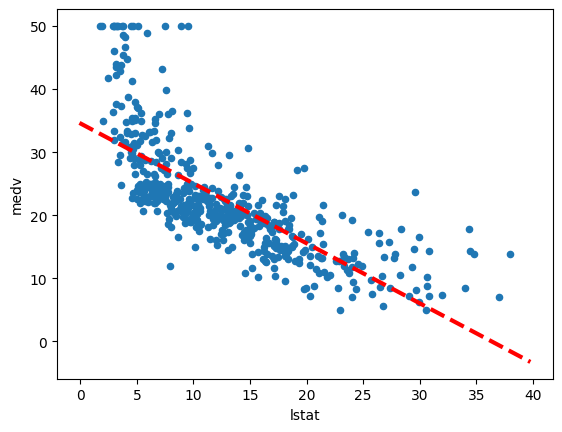

In [85]:
ax = Boston.plot.scatter("lstat","medv")
abline(ax,results.params[0],results.params[1],"r--",linewidth=3)

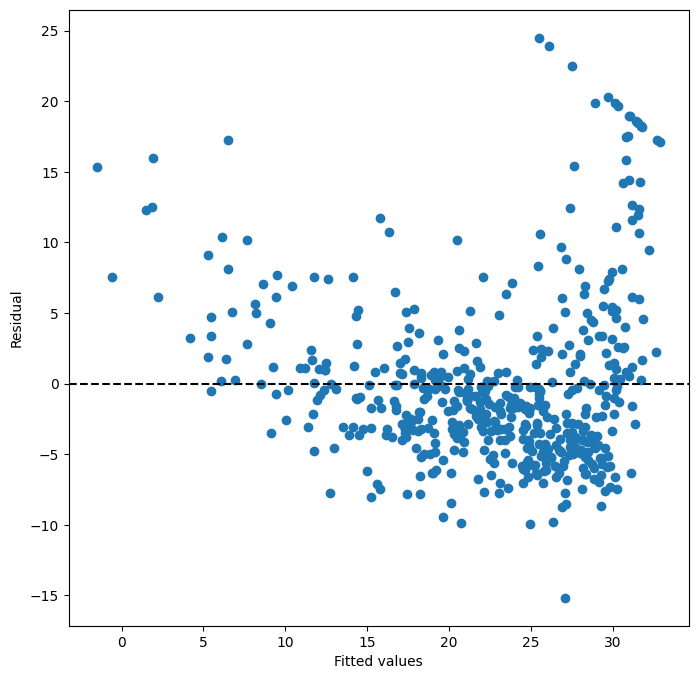

In [86]:
ax =subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residual")
ax.axhline(0, c="k",ls="--");

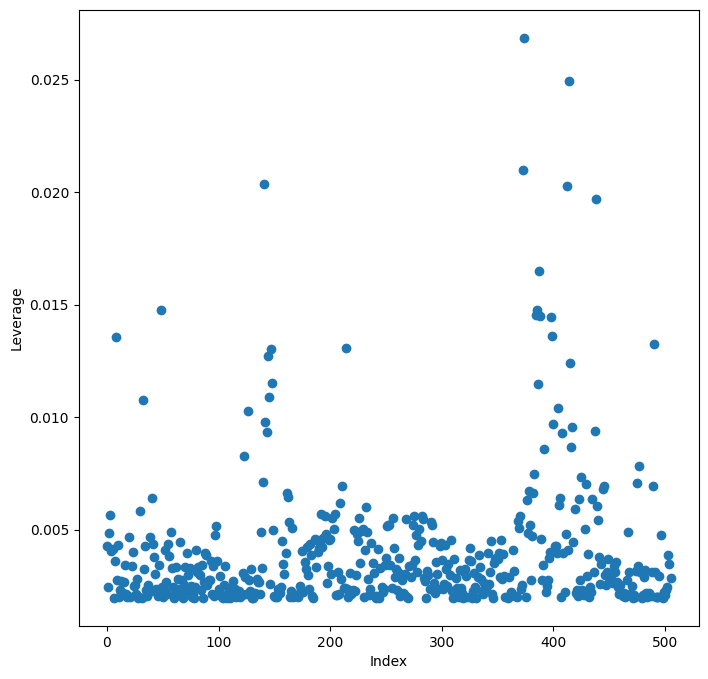

In [87]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel("Index")
ax.set_ylabel("Leverage");

In [88]:
np.argmax(infl.hat_matrix_diag)

374

In [89]:
# Multiple linear regression

X = MS(["lstat","age"]).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [90]:
terms = Boston.columns.drop("medv")
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [91]:
X = MS(terms).fit_transform(Boston)
results = sm.OLS(y, X).fit()
summarize(results)

terms = Boston.columns.drop(["medv","age"])
X = MS(terms).fit_transform(Boston)
results = sm.OLS(y, X).fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


In [92]:
dir(results)
results.rsquared
results.fvalue
np.sqrt(results.scale)

4.793532256301407

In [93]:
vals = [VIF(X,i) for i in range(1, X.shape[1])]
vif = pd.DataFrame({"vif":vals},index = X.columns[1:])
vif

,vif
crim,1.767455
zn,2.265259
indus,3.987176
chas,1.068018
nox,4.070020
rm,1.834792
dis,3.613722
rad,7.396707
tax,8.994939
ptratio,1.785403


In [94]:
X = MS(["lstat","age",("lstat","age")]).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

X

,intercept,lstat,age,lstat:age
0,1.0,4.98,65.2,324.696
1,1.0,9.14,78.9,721.146
2,1.0,4.03,61.1,246.233
3,1.0,2.94,45.8,134.652
4,1.0,5.33,54.2,288.886
...,...,...,...,...
501,1.0,9.67,69.1,668.197
502,1.0,9.08,76.7,696.436
503,1.0,5.64,91.0,513.240
504,1.0,6.48,89.3,578.664


In [95]:
X = MS([poly("lstat",degree=2),"age"]).fit_transform(Boston)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

anova_lm(results1, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


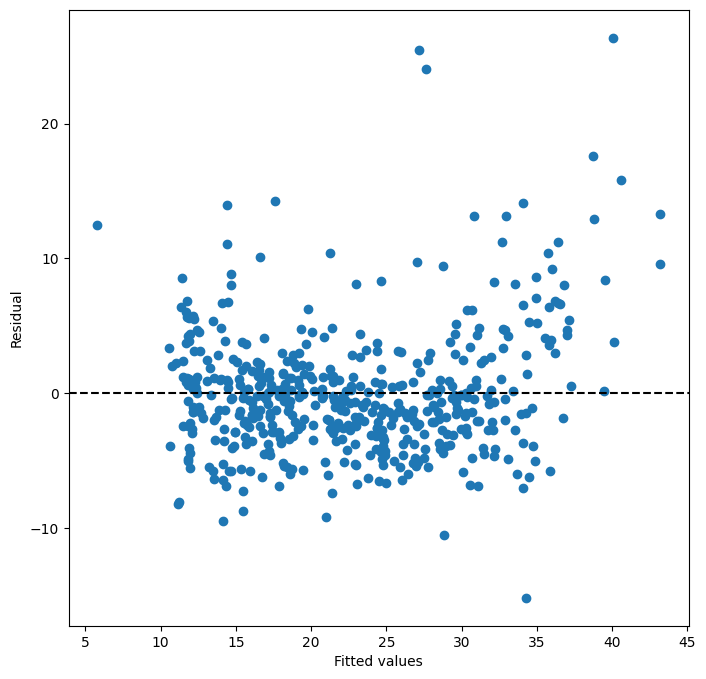

In [96]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues, results.resid)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residual")
ax.axhline(0, c="k",ls = "--")

In [97]:
Carseats = load_data("Carseats")
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [101]:
allvars = list(Carseats.columns.drop("Sales"))
y = Carseats["Sales"]
final = allvars + [("Income","Advertising","Price","Age")]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y,X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.146300e+00,6.510000e-01,9.438,0.000
CompPrice,9.280000e-02,4.000000e-03,22.445,0.000
Income,1.330000e-02,2.000000e-03,5.952,0.000
Advertising,9.450000e-02,1.800000e-02,5.129,0.000
Population,2.000000e-04,0.000000e+00,0.492,0.623
Price,-9.660000e-02,3.000000e-03,-35.283,0.000
ShelveLoc[Good],4.855300e+00,1.530000e-01,31.820,0.000
ShelveLoc[Medium],1.966700e+00,1.260000e-01,15.638,0.000
Age,-4.900000e-02,4.000000e-03,-13.926,0.000
Education,-2.210000e-02,2.000000e-02,-1.126,0.261
